# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

path="/content/drive/MyDrive/Python Course/foodhub_order.csv" #load csv file from drive

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv(path)
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
df.shape

(1898, 9)

#### Observations:

There are 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

There are no null values

*order_id, customer id, food_preparation_time, and delivery_time are integers

*restaurant_name, cuisine_type, day_of_the_week, and rating are all objects

*cost_of_the_order is a float


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

There are no missing values.  You can also get this from the info command.  The number of values equalled the number of rows.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


#### Observations:

The minimum order prep time is 20 minutes

The average order prep time is 27.4 minutes

The maximum order prep time is 35 minutes

The most popular cuisine type is American

The number of American cuisine orders is 584

The most popular restaurant is shake shack with 219 orders


### **Question 5:** How many orders are not rated? [1 mark]

rating
3            188
4            386
5            588
Not given    736
dtype: int64

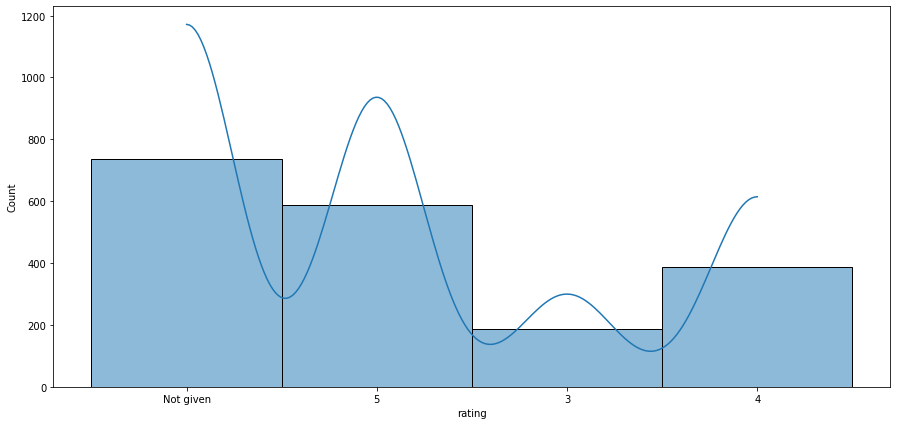

In [ ]:
# Write the code here
plt.figure(figsize=(15, 7))
sns.histplot(data= df, x= "rating", kde= True);

df.groupby(['rating']).size()

#### Observations:

736 orders have not been rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

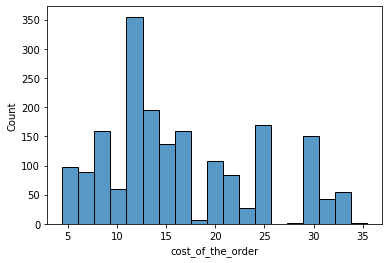

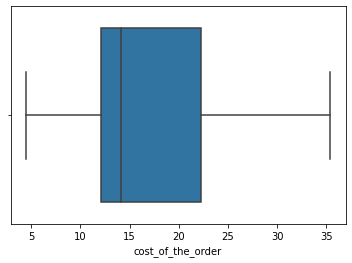

In [ ]:
# Write the code here

sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()



*   There are no outlier
*   75% of orders are about $22
*   Slightly right skew





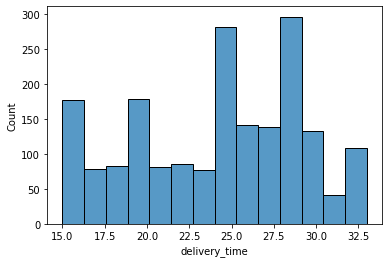

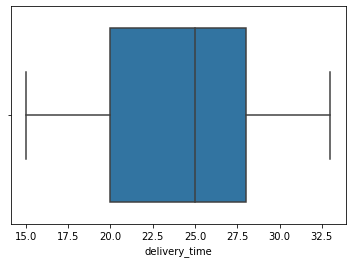

In [ ]:
#univariate look at delivery time in minutes

sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()



*   Max delivery time is 32.5 minutes
*   minimum delivery time is 15 minutes
*   median delivery is 25 minutes




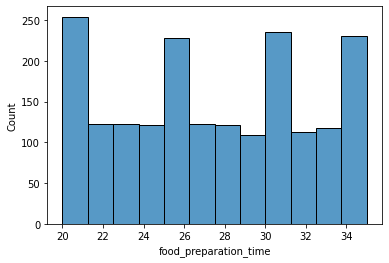

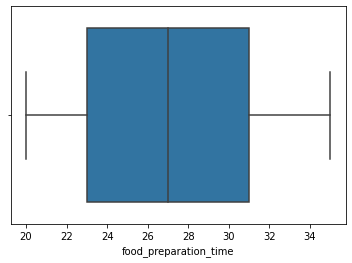

In [ ]:
#univariate look at food preparation time in minutes

sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()



*   Max prep time is 35 minutes
*   minimum prep time is 20 minutes
*   median prep time is 27 minutes
*   even distribution





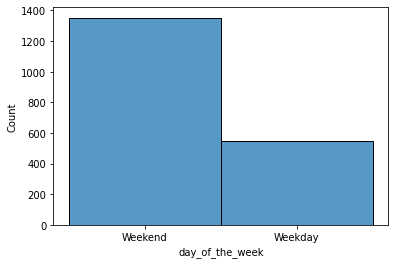

In [ ]:
#univariate look at day of the week

sns.histplot(data=df,x='day_of_the_week')
plt.show()


Observation: The majority of the orders are on the weekend

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64


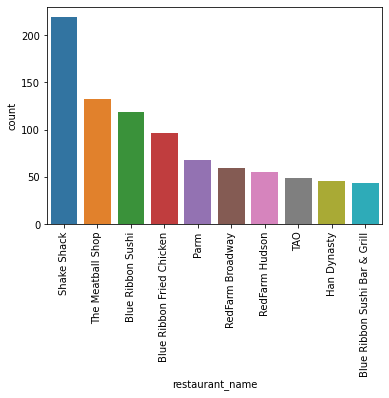

In [ ]:
#top restuarants by name
restnamesort=df['restaurant_name'].value_counts().sort_values(ascending=False).head(10)
print(restnamesort)

sns.countplot(x ='restaurant_name', data=df, order=pd.value_counts(df['restaurant_name']).iloc[:10].index);
plt.xticks(rotation=90);

American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: cuisine_type, dtype: float64

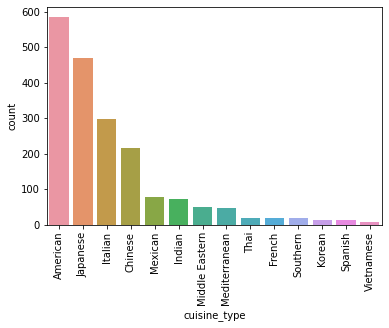

In [ ]:
#univariate look at type of cuisine
sns.countplot(data=df, x ='cuisine_type', order = df['cuisine_type'].value_counts().index);
plt.xticks(rotation=90);

df['cuisine_type'].value_counts(normalize=True)

Observation: American cuisine is most popular followed by Japanese, Italian, and Chinese.  14 different styles of cuisine are offered.  The top 4 categories (American, Japanese, Italian, and Chinese) make up about 70% of all the orders.

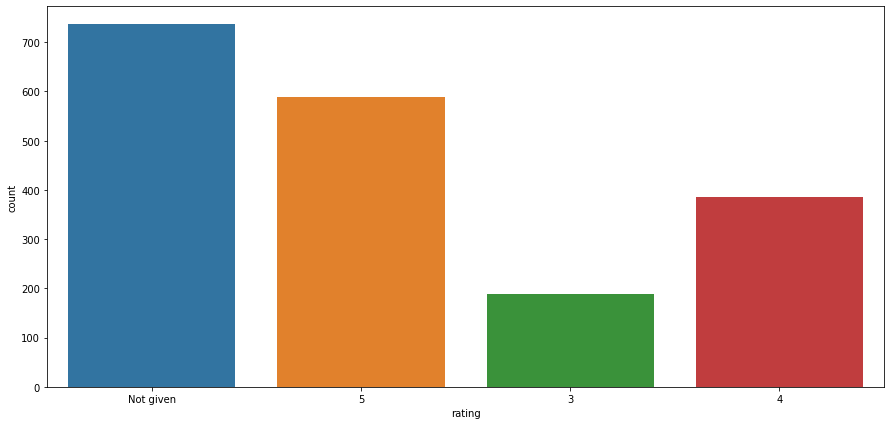

In [ ]:
#Univariate look at rating

plt.figure(figsize=(15, 7))
sns.countplot(data= df, x= "rating");


Observations: There are a lot of records with no rating.  There are also no 1 or 2 ratings and some 3, 4, and 5 ratings.

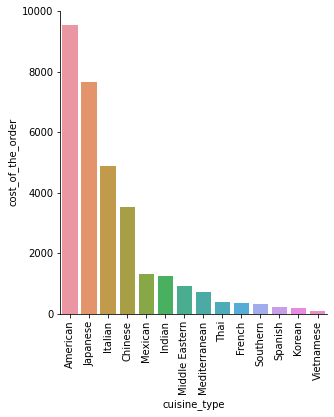

In [ ]:
dfcuisinevalue = df.groupby('cuisine_type')['cost_of_the_order'].sum().sort_values(ascending=False).reset_index() #sum the total value of orders by cuisine
dfcuisinevalue

sns.catplot(data=dfcuisinevalue, x = 'cuisine_type', y = 'cost_of_the_order', kind = 'bar' ) #plot these numbers
plt.xticks(rotation=90);
plt.show()


In [ ]:
#number of unique customers

df['customer_id'].nunique() #number of customers
#df['customer_id'].count() #number of orders

1200

Observations: 1200 customers have orderd the 1898 orders.  Mostly one time orders.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
#top 5 restaurants by orders received, group by restuarant, count the number of orders and sort them.

top5restaurants = df.groupby('restaurant_name').count()[['order_id']].sort_values('order_id', ascending=False).reset_index().head(5) 
top5restaurants

,restaurant_name,order_id
0,Shake Shack,219
1,The Meatball Shop,132
2,Blue Ribbon Sushi,119
3,Blue Ribbon Fried Chicken,96
4,Parm,68


#### Observations: Shake Shack has the most orders followed by The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here

#1st create a dataframe with only weeknd data
dfweekend = df[df['day_of_the_week']=='Weekend']
dfweekend

#now find the most popular cuisine on the weekends

dfweekend['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: American Cuisine is the most popular on the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

df[df['cost_of_the_order']>20].shape[0] #Number of orders that cost more the $20.
df['cost_of_the_order'].shape[0] #Number of total orders

Percentgreaterthan20 = round(df[df['cost_of_the_order']>20].shape[0]/df['cost_of_the_order'].shape[0]*100,2) #calculate the percent of orders over $20
print(Percentgreaterthan20)

29.24


#### Observations:
29.24% of the orders are over $20

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

df['delivery_time'].mean()

24.161749209694417

#### Observations: The average delivery time is just over 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

top3customers = df.groupby('customer_id').count()[['order_id']].sort_values('order_id', ascending=False).reset_index().head(3) 
top3customers

,customer_id,order_id
0,52832,13
1,47440,10
2,83287,9


#### Observations: Customer with ID 52832 placed 13 orders followed by customer ID 47440 with 10 orders and customer 83287 placed 9 orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


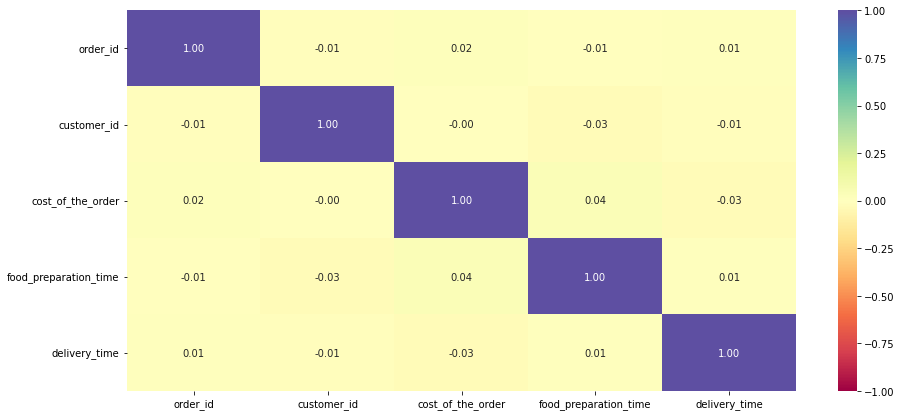

In [ ]:
# Write the code here

# Check for correlation among numerical variables
num_var = ['order_id','customer_id','cost_of_the_order','food_preparation_time','delivery_time']

corr = df[num_var].corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observation: There is not a strong correlation between any of the variables.  The biggest correlation is between cost of the order and food preparation time, but it is still a small correlation.

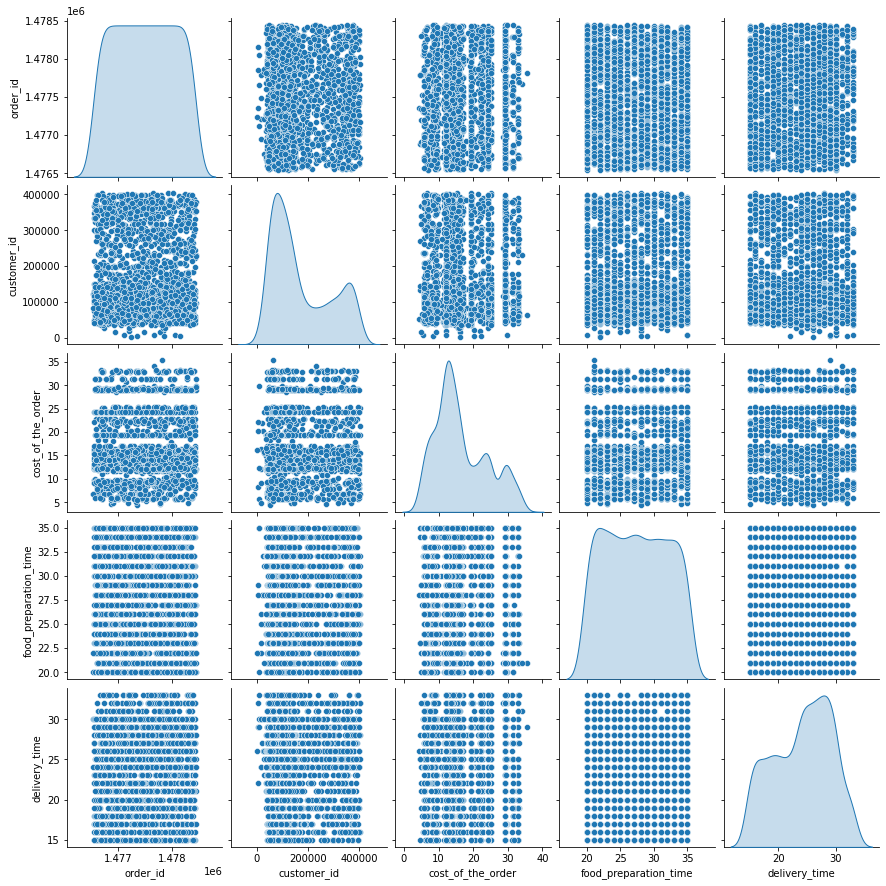

In [ ]:
#create a pairplot of all the numerical variables

sns.pairplot(data=df[num_var], diag_kind="kde")
plt.show()

Observation: Same as the heatmap.  There are not any strong correlations between data.

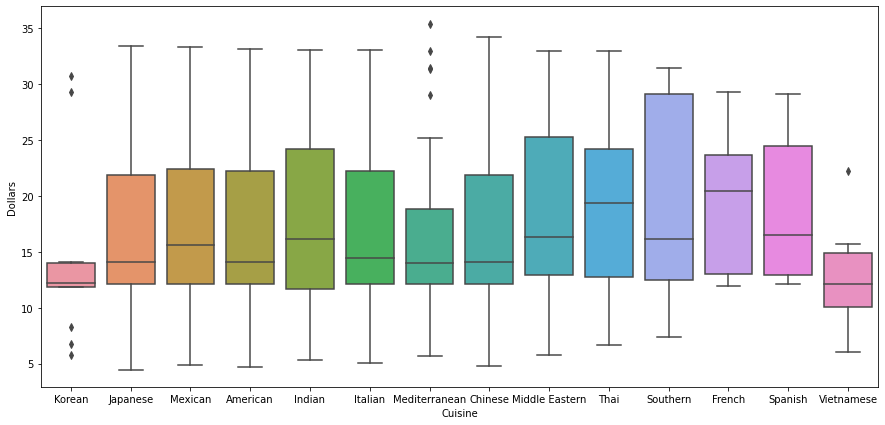

In [ ]:
#dollars by cuisine

plt.figure(figsize=(15,7))           
sns.boxplot(x=df['cuisine_type'], y=df['cost_of_the_order'])
plt.ylabel('Dollars')
plt.xlabel('Cuisine')
plt.show()

Observations: 



*   Korean Food has the least variability and is generally cheapest
*   French food has a higher median price
*   Mediteranian cuisine has more variability on the high end





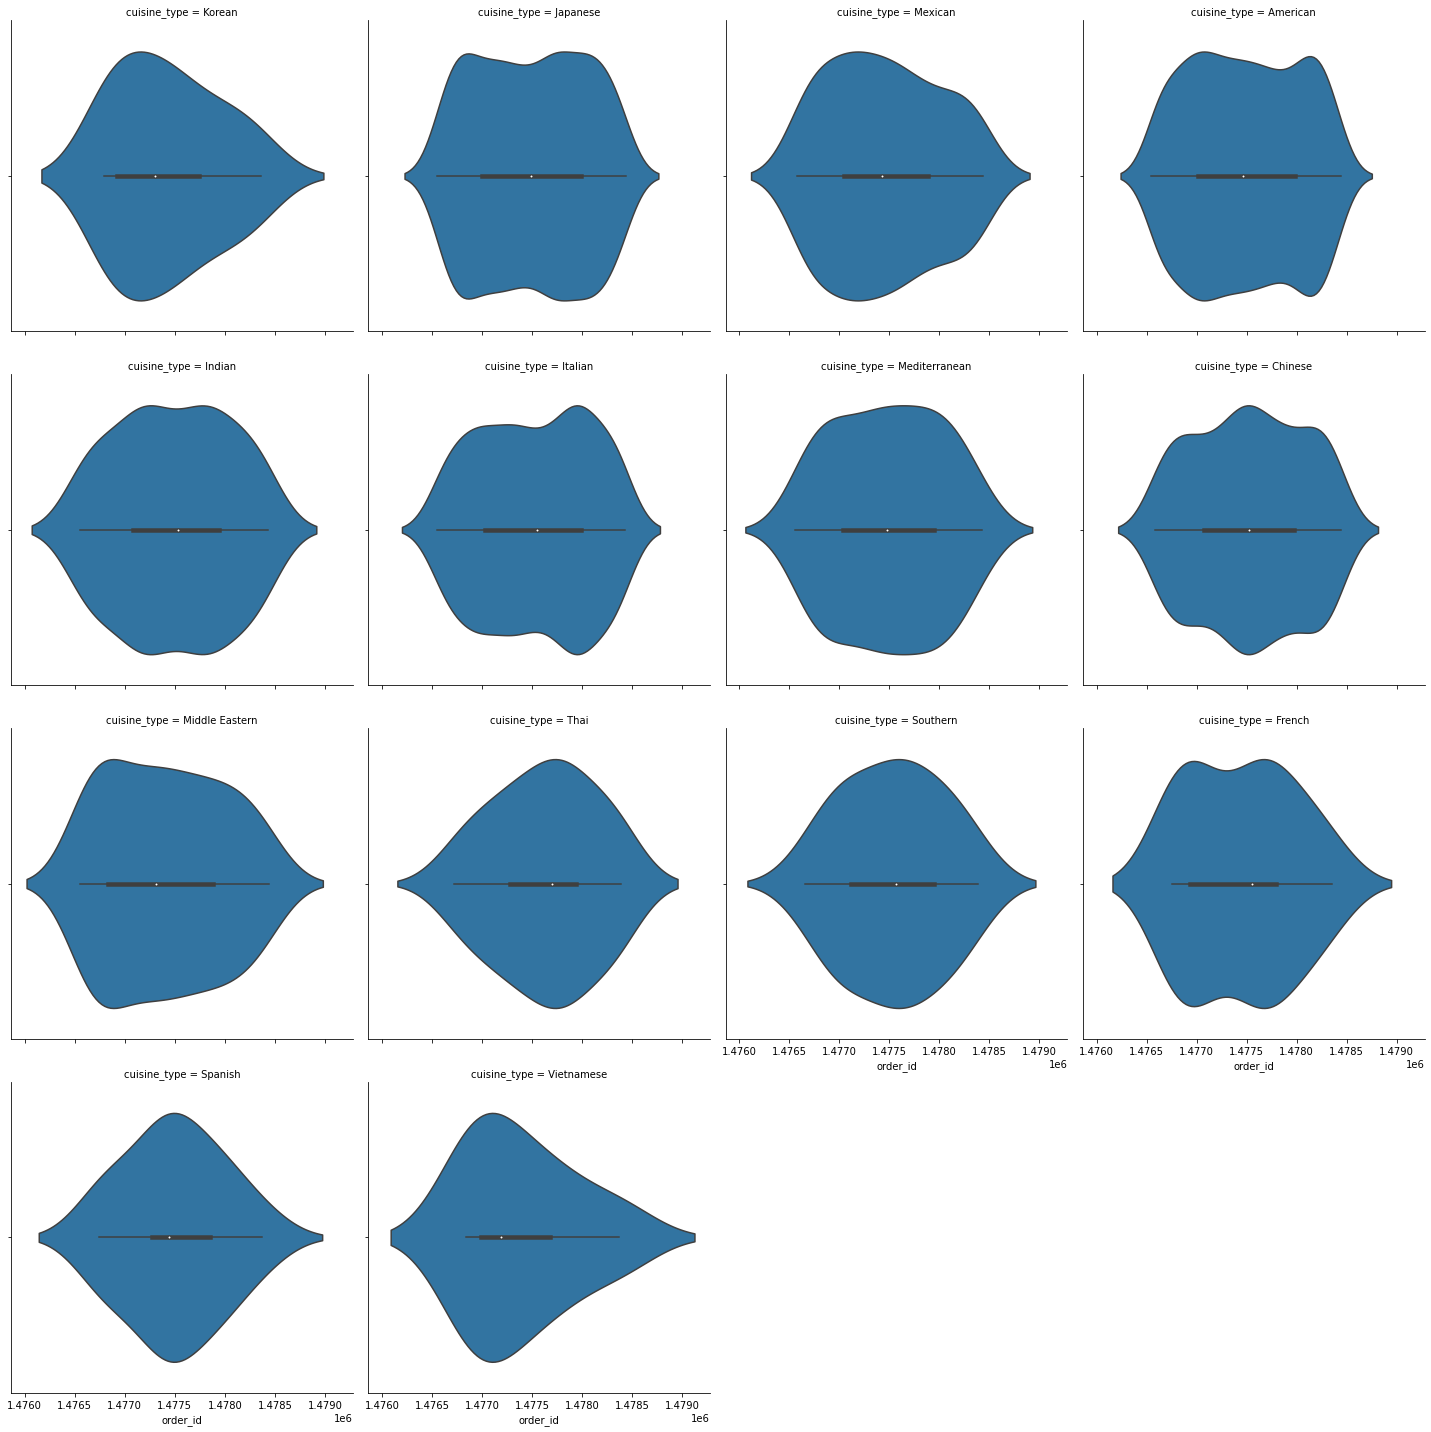

In [ ]:
# Dispersion of Dollars in every cuisine type
sns.catplot(x='order_id', col='cuisine_type', data=df, col_wrap=4, kind="violin")
plt.show()

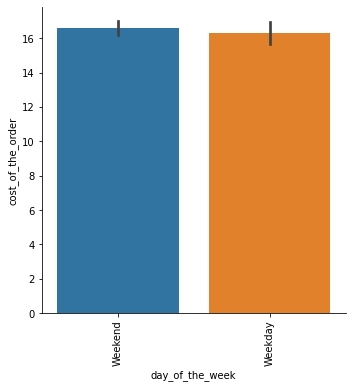

In [ ]:
#compare order costs based on day of the week.
sns.catplot(x='day_of_the_week', y='cost_of_the_order', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()

Observation: There is almost no difference in cost of an order based on the day of the week.

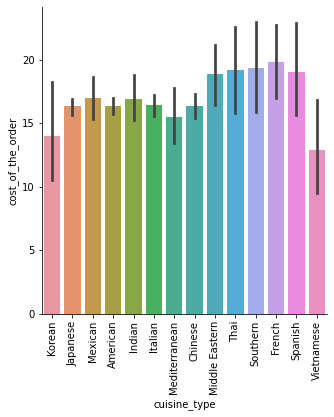

In [ ]:
#look at cuisine type and cost of order
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df, kind="bar")
plt.xticks(rotation=90)
plt.show()

Observation: French cuisine is the most expensive type of cuisine and Vietnamese cuisine is the cheapest.  Very little variability in Japanese cuisine.

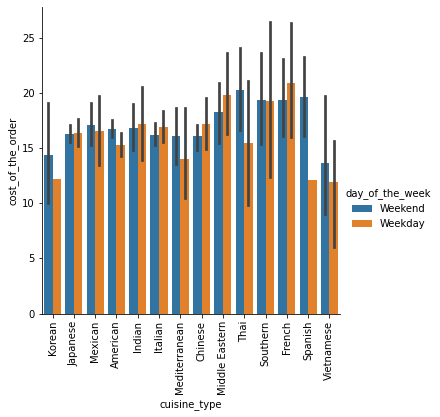

In [ ]:
#plot to show cuisine type and cost of order for the weekdays and weekends.
sns.catplot(x='cuisine_type', y='cost_of_the_order', data=df, kind="bar", hue='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

Observations:



*   Most cuisine types have a higher spend on the weekend as opposed to the weeday, other than japanese, Indian, Italian, Chinese, Middle Eastern, and French
*   List item



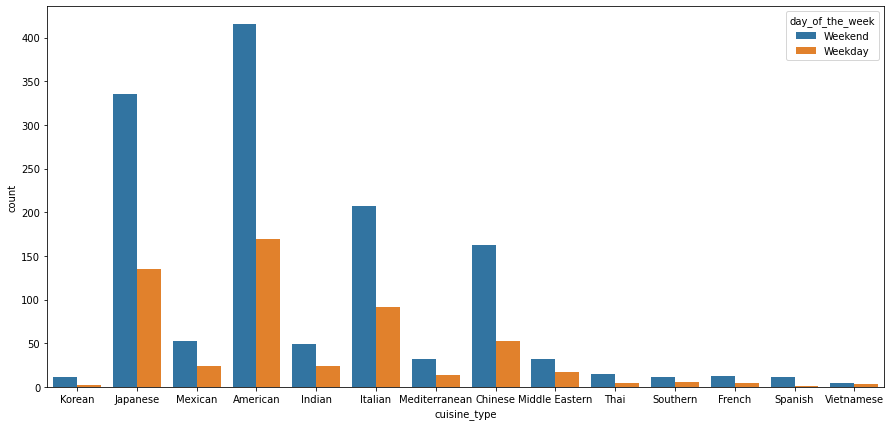

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data= df, x= "cuisine_type", hue='day_of_the_week');

Observation: All cuisine types have more orders on the weekend as opposed to the week.

In [ ]:
# Check if the trend is similar across cuisine
df.groupby(by = ['cuisine_type','day_of_the_week'])['cost_of_the_order'].sum()

cuisine_type    day_of_the_week
American        Weekday            2587.11
                Weekend            6943.67
Chinese         Weekday             891.68
                Weekend            2613.94
French          Weekday             104.33
                Weekend             251.96
Indian          Weekday             411.90
                Weekend             823.24
Italian         Weekday            1537.00
                Weekend            3355.77
Japanese        Weekday            2209.69
                Weekend            5453.44
Korean          Weekday              24.36
                Weekend             157.66
Mediterranean   Weekday             196.56
                Weekend             515.28
Mexican         Weekday             397.34
                Weekend             906.51
Middle Eastern  Weekday             337.16
                Weekend             585.05
Southern        Weekday             115.36
                Weekend             212.75
Spanish         Weekda

In [ ]:
# Check on which cuisine brings in the most money
print(df.groupby(['cuisine_type'])['cost_of_the_order'].sum().sort_values(ascending=False)) #total dollars spent on each cuisine type
print(df.groupby(['cuisine_type'])['cost_of_the_order'].mean().sort_values(ascending=False)) #average cost of order for each cuisine type


cuisine_type
American          9530.78
Japanese          7663.13
Italian           4892.77
Chinese           3505.62
Mexican           1303.85
Indian            1235.14
Middle Eastern     922.21
Mediterranean      711.84
Thai               364.95
French             356.29
Southern           328.11
Spanish            227.93
Korean             182.02
Vietnamese          90.18
Name: cost_of_the_order, dtype: float64
cuisine_type
French            19.793889
Southern          19.300588
Thai              19.207895
Spanish           18.994167
Middle Eastern    18.820612
Mexican           16.933117
Indian            16.919726
Italian           16.418691
American          16.319829
Chinese           16.305209
Japanese          16.304532
Mediterranean     15.474783
Korean            14.001538
Vietnamese        12.882857
Name: cost_of_the_order, dtype: float64


Observations:  The total dollars in order correlate with the number of orders received for each style of cuisine.  However, French cuisine receives the most per order and Vietnamese is the lowest average order price.  All styles average less than $20 per order.

In [ ]:
#look to see what the top 3 restaurants for each cuisine style is

dfrestaurantorders = df.groupby(by = ['restaurant_name', 'cuisine_type']).count()[['order_id']].sort_values('order_id', ascending =False).reset_index() #sort restaurants by numboer of orders
dfrestaurantorders
df3 = dfrestaurantorders.groupby('cuisine_type').head(3) #groupby cuisine type and select top 3 restaurants in each cuisine type
df4 = df3.sort_values(by = ['cuisine_type', 'order_id'], ascending = False) #sort them by cuisine type
df4


,restaurant_name,cuisine_type,order_id
81,V-Nam Cafe,Vietnamese,4
124,Xe May Sandwich Shop,Vietnamese,2
167,Nha Trang One,Vietnamese,1
71,Lantern Thai Kitchen,Thai,4
73,Pinto Nouveau Thai Bistro,Thai,4
91,Room Service,Thai,3
45,Boqueria,Spanish,9
128,DespaÌ±a,Spanish,2
129,Socarrat Paella Bar,Spanish,1
33,Hill Country Fried Chicken,Southern,14


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

df1=df.copy()
df1['rating'] = pd.to_numeric(df1['rating'], errors='coerce') #convert rating from object type to numeric type
df1['rating'] = df1['rating'].fillna(0) #fill Nan values with 0
df1.head()

# remove rows using the drop() function for any rating of 0
df1= df1.drop(df1.index[df1['rating'] == 0], inplace=False)

dfaveratingcount = df1.groupby('restaurant_name').agg(ave_rating=('rating','mean'),
                       restuarant_count=('rating','count')).reset_index() #groupby restaurant and average on rating and then count the number of ratings

dfaveratingcount.sort_values(ascending = False, by = 'restuarant_count') #sort in descending order based on restuarant spelled wrong.

dfaveratingcount[(dfaveratingcount['restuarant_count'] > 50)].sort_values(ascending = False, by = 'restuarant_count') #remove restuarants with less than 50 ratings.
 

,restaurant_name,ave_rating,restuarant_count
117,Shake Shack,4.278195,133
132,The Meatball Shop,4.511905,84
17,Blue Ribbon Sushi,4.219178,73
16,Blue Ribbon Fried Chicken,4.328125,64


#### Observations: There are 4 restaurants meeting this criteria.  They are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, and Blue Ribbon Fried Chicken.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

def revenues(oc):   #create a function for calculating revenue based on cost of the order.
  if (oc > 20):   #if greater than $20 the revenue is 25%
    r = oc*.25
  elif(oc > 5): #if greater than $5 the revenue is 15%
    r = oc*.15
  else:
    r = 0   #else no revenue

  return r     #returns r

rev = revenues(21)  #test function works
#print(rev)

df['revenue'] = df['cost_of_the_order'].apply(revenues).round(2) #create new column called revenue and use the function to calculate it.
df.head()
df.size
df.info

df['revenue'].sum().round(2) #sum the revenue column




6166.4

#### Observations: The net revenue is $6,166.40.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#create function for calculating total_delivery_time
def total_time(preptime, deliverytime):   #create a function for calculating total delivery time based on prep time and delivery time.
  TD = preptime + deliverytime

  return TD     #returns total delivery time

test = total_time(22,10) #test function
#print(test)

df['total_delivery_time'] = df.apply(lambda x: total_time(x.food_preparation_time, x.delivery_time), axis=1) #create new column called revenue and use the function to calculate it.
df.head()

#count number of rows that have value greater than 60 for total delivery time
Morethan60count=df.loc[df['total_delivery_time'] >60]
Morethan60count.shape[0] #number of rows with orders more than 60 minutes for total delivery
print(Morethan60count.shape[0])

df.shape[0] #total number of rows
print(df.shape[0])

percentover60 = (Morethan60count.shape[0]/df.shape[0])*100 #calculate the % of orders more than 60 minutes for total delivery time.
percentover60


200
1898


10.537407797681771

#### Observations: There are 200 orders out of a total of 1898 that took over 60 minutes to deliver.  This is 10.54% of the orders.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

dfweekenddelivery = df.loc[df['day_of_the_week']=='Weekend'] #Create a data frame with only weekend data
dfweekenddelivery.head() #validate data
dfweekenddelivery.shape #validate data

aveweekenddelivery = round(dfweekenddelivery['delivery_time'].mean(),2) #Find average delivery time on the weekend

dfweekdaydelivery = df.loc[df['day_of_the_week']=='Weekday'] #Create a data frame with only weekdays data
dfweekdaydelivery.head() #validate data
dfweekdaydelivery.shape #validate data

aveweekdaydelivery = round(dfweekdaydelivery['delivery_time'].mean(),2) #Find average delivery time on the weekdays

total = dfweekdaydelivery.shape[0] + dfweekenddelivery.shape[0] #validate correct number of records
total

#add a print statement for weekend Vs weekday
print('The average delivery time on the weekends is, '+ str(aveweekenddelivery) + ' minutes\n')
print('The average delivery time on the weekdays is, '+ str(aveweekdaydelivery) + ' minutes\n')

df.groupby('day_of_the_week')['delivery_time'].mean().round(2) #more pythonic version
#df['day_of_the_week'].value_counts(normalize=True)


The average delivery time on the weekends is, 22.47 minutes

The average delivery time on the weekdays is, 28.34 minutes



day_of_the_week
Weekday    28.34
Weekend    22.47
Name: delivery_time, dtype: float64

#### Observations: The delivery time is almost 6 minutes longer on weekdays than on weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Weekends are the busiest
*  American Food receives the most orders
*  Average order value is between 12 and 20 dollars
*  American, Chinese, Italian, and Japanese make up the bulk of all orders





### Recommendations:

*  Deliver faster during the week
*  Need to develop more sales during the week
*  Offer incentives in order to recieve more ratings in order to improve       feedback

*   Concentrate on expanding lower volume cuisine types, top ones are pretty saturated






In [ ]:
#code to convert to html
%%shell
jupyter nbconvert --to html ///content/drive/MyDrive/Colab_Notebooks/PYF_Project_LearnerNotebook_FullCode.ipynb




[NbConvertApp] Converting notebook ///content/drive/MyDrive/Colab_Notebooks/PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1462046 bytes to ///content/drive/MyDrive/Colab_Notebooks/PYF_Project_LearnerNotebook_FullCode.html


---